# 3-sample -> 2-sample and testing of subvectors

In [8]:
from collections import defaultdict
from scipy.spatial.distance import squareform, pdist
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

# custom seaborn plot options to make the figures pretty
sns.set(color_codes=True, style='white', context='notebook', font_scale=1.25)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[3:])

from hyppo.independence import Dcorr
from hyppo.ksample._utils import k_sample_transform

In [164]:
def center_distmat(distx, bias=False):  # pragma: no cover
    """Centers the distance matrices"""
    n = distx.shape[0]
    if bias:
        # use sum instead of mean because of numba restrictions
        exp_distx = (
            np.repeat(distx.sum(axis=0) / n, n).reshape(-1, n).T
            + np.repeat(distx.sum(axis=1) / n, n).reshape(-1, n)
            - (distx.sum() / (n * n))
        )
    else:
        exp_distx = (
            np.repeat((distx.sum(axis=0) / (n - 2)), n).reshape(-1, n).T
            + np.repeat((distx.sum(axis=1) / (n - 2)), n).reshape(-1, n)
            - distx.sum() / ((n - 1) * (n - 2))
        )
    cent_distx = distx - exp_distx
    if not bias:
        np.fill_diagonal(cent_distx, 0)
    return cent_distx

def numer_stat(x,y):
    xdist = center_distmat(squareform(pdist(x))**2)
    ydist = center_distmat(squareform(pdist(y)))
    
    return np.sum(np.multiply(xdist, ydist))

In [148]:
X1 = np.random.normal(0,1,(50,4))
X2 = np.random.normal(0,1,(50,4))
X3 = np.random.normal(0,1,(50,4))
X, Y = k_sample_transform((X1,X2,X3))

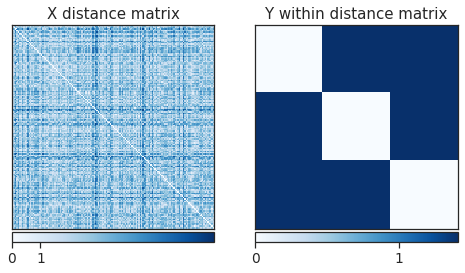

In [149]:
#fig, axes = plt.subplots(2,3, figsize=(4, 4*len(data_dict.keys())))
fig = plt.figure(figsize=(8, 4))

# Show data example
ax = fig.add_subplot(121)

heatmap = ax.pcolor(squareform(pdist(X)), cmap=plt.cm.Blues)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('X distance matrix')

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.05)
plt.colorbar(heatmap, cax=cax, ticks=[0, 1], orientation='horizontal')

# Plot Y matrices
ax = fig.add_subplot(122)
heatmap = ax.pcolor(squareform(pdist(Y)), cmap=plt.cm.Blues)
#ax.colorbar(heatmap)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Y within distance matrix')
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.05)
plt.colorbar(heatmap, cax=cax, ticks=[0, 1], orientation='horizontal')

plt.show()

In [42]:
result_dict = {}

dcorr = Dcorr()
stat, pval = dcorr.test(
    X,Y,
    reps=1,
    auto=False,
)
result_dict['123'] = [stat, dcorr.null_dist[0]]

dcorr = Dcorr()
stat, pval = dcorr.test(
    X[:100],Y[:100],
    reps=1,
    auto=False,
)
result_dict['12'] = [stat, dcorr.null_dist[0]]

dcorr = Dcorr()
idx13 = np.hstack((np.arange(50),np.arange(100,150)))
stat, pval = dcorr.test(
    X[idx13],Y[idx13],
    reps=1,
    auto=False,
)
result_dict['13'] = [stat, dcorr.null_dist[0]]

dcorr = Dcorr()
stat, pval = dcorr.test(
    X[50:],Y[50:],
    reps=1,
    auto=False,
)
result_dict['23'] = [stat, dcorr.null_dist[0]]

/home/rflperry/hyppo/hyppo/_utils.py:66: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/home/rflperry/hyppo/hyppo/_utils.py:66: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/home/rflperry/hyppo/hyppo/_utils.py:66: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/home/rflperry/hyppo/hyppo/_utils.py:66: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


In [43]:
result_dict

{'123': [-0.0026870234155225983, -0.008174392131016351],
 '12': [0.0012894449071437543, 0.002968953025732788],
 '13': [-0.012997044329504047, -0.001148974323111273],
 '23': [0.0033246860636651225, 0.002209821950115956]}

In [51]:
stat3 = result_dict['123'][0]**2
stat2 = result_dict['12'][0]**2 + result_dict['13'][0]**2 + result_dict['23'][0]**2

In [52]:
stat2 / stat3

25.157476602497265

In [165]:
numer_stat(X, Y)

1264.091555798761

In [166]:
X12, Y12 = k_sample_transform((X1,X2))
X23, Y23 = k_sample_transform((X2,X3))
X13, Y13 = k_sample_transform((X1,X3))

In [167]:
numer_stat(X12, Y12)

858.849527148588

In [168]:
numer_stat(X23, Y23)

-32.679198857455276

In [169]:
numer_stat(X13, Y13)

519.1156208073276

In [172]:
numer_stat(X, Y) / (numer_stat(X12, Y12) + numer_stat(X23, Y23) + numer_stat(X13, Y13)) / (150/100)

0.6264301685679482

### Partition

In [140]:
X1 = np.random.normal(0,1,(50,5))
X2 = np.random.normal(0,1,(50,5))
X, Y = k_sample_transform((X1,X2))

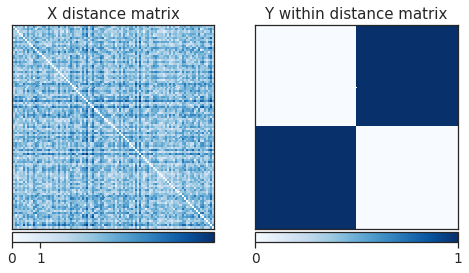

In [141]:
#fig, axes = plt.subplots(2,3, figsize=(4, 4*len(data_dict.keys())))
fig = plt.figure(figsize=(8, 4))

# Show data example
ax = fig.add_subplot(121)

heatmap = ax.pcolor(squareform(pdist(X)), cmap=plt.cm.Blues)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('X distance matrix')

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.05)
plt.colorbar(heatmap, cax=cax, ticks=[0, 1], orientation='horizontal')

# Plot Y matrices
ax = fig.add_subplot(122)
heatmap = ax.pcolor(squareform(pdist(Y)), cmap=plt.cm.Blues)
#ax.colorbar(heatmap)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Y within distance matrix')
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.05)
plt.colorbar(heatmap, cax=cax, ticks=[0, 1], orientation='horizontal')

plt.show()

In [142]:
result_dict = {}

dcorr = Dcorr()
stat, pval = dcorr.test(
    X,Y,
    reps=1,
    auto=False,
)
result_dict['12'] = stat

/home/rflperry/hyppo/hyppo/_utils.py:66: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


In [143]:
X11 = X1[:,:2]
X12 = X1[:,2:]
X21 = X2[:,:2]
X22 = X2[:,2:]
X_1, Y_1 = k_sample_transform((X11,X21))
X_2, Y_2 = k_sample_transform((X12,X22))

In [144]:
dcorr = Dcorr(bias=True)
stat, pval = dcorr.test(
    X_1,Y_1,
    reps=1,
    auto=False,
)
result_dict['_1'] = stat

dcorr = Dcorr()
stat, pval = dcorr.test(
    X_2,Y_2,
    reps=1,
    auto=False,
)
result_dict['_2'] = stat

/home/rflperry/hyppo/hyppo/_utils.py:66: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)
/home/rflperry/hyppo/hyppo/_utils.py:66: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


In [145]:
numer_stat(X, Y)

196.43535985256446

In [146]:
numer_stat(X_1, Y_1)

443.8521463859804

In [147]:
numer_stat(X_2, Y_2) + numer_stat(X_1, Y_1)

196.43535985256446

In [134]:
result_dict

{'12': 0.008584963307135204,
 '_1': 0.019514908250455276,
 '_2': 0.008629384207841742}